# Importacao de bibliotecas

In [428]:
import pandas as pd; pd.set_option('display.max_rows', 20); pd.set_option('display.max_columns', 1000); pd.set_option('display.width', 1000)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Tratamento dados

In [429]:
df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [430]:
df.head()

,track_unique_id,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity_target
0,41996,7hUhmkALyQ8SX9mJs5XI3D,Love and Rockets,Love and Rockets,Motorcycle,211533,False,0.305,0.8490,9,-10.795,1,0.0549,0.000058,0.056700,0.4640,0.3200,141.793,4,goth,0
1,76471,5x59U89ZnjZXuNAAlc8X1u,Filippa Giordano,Filippa Giordano,"Addio del passato - From ""La traviata""",196000,False,0.287,0.1900,7,-12.030,0,0.0370,0.930000,0.000356,0.0834,0.1330,83.685,4,opera,0
2,54809,70Vng5jLzoJLmeLu3ayBQq,Susumu Yokota,Symbol,Purple Rose Minuet,216506,False,0.583,0.5090,1,-9.661,1,0.0362,0.777000,0.202000,0.1150,0.5440,90.459,3,idm,1
3,16326,1cRfzLJapgtwJ61xszs37b,Franz Liszt;YUNDI,Relajación y siestas,"Liebeslied (Widmung), S. 566",218346,False,0.163,0.0368,8,-23.149,1,0.0472,0.991000,0.899000,0.1070,0.0387,69.442,3,classical,0
4,109799,47d5lYjbiMy0EdMRV8lRou,Scooter,Scooter Forever,The Darkside,173160,False,0.647,0.9210,2,-7.294,1,0.1850,0.000939,0.371000,0.1310,0.1710,137.981,4,techno,0


In [431]:
df.keys()

Index(['track_unique_id', 'track_id', 'artists', 'album_name', 'track_name', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre', 'popularity_target'], dtype='object')

In [432]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79800 entries, 0 to 79799
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_unique_id    79800 non-null  int64  
 1   track_id           79800 non-null  object 
 2   artists            79800 non-null  object 
 3   album_name         79800 non-null  object 
 4   track_name         79800 non-null  object 
 5   duration_ms        79800 non-null  int64  
 6   explicit           79800 non-null  bool   
 7   danceability       79800 non-null  float64
 8   energy             79800 non-null  float64
 9   key                79800 non-null  int64  
 10  loudness           79800 non-null  float64
 11  mode               79800 non-null  int64  
 12  speechiness        79800 non-null  float64
 13  acousticness       79800 non-null  float64
 14  instrumentalness   79800 non-null  float64
 15  liveness           79800 non-null  float64
 16  valence            798

In [433]:
#Alterando coluna 'explicit' para numero
df['explicit_numeric'] = df['explicit'].astype(int)
test_df['explicit_numeric'] = test_df['explicit'].astype(int)

In [434]:
#dropando colunas de menor importancia
df = df.drop(columns= ['track_id', 'explicit', 'album_name', 'track_name'])
test_df = test_df.drop(columns= ['track_id', 'explicit', 'album_name', 'track_name'])

In [435]:

df['danceability_energy'] = df['danceability'] * df['energy']

test_df['danceability_energy'] = test_df['danceability'] * test_df['energy']


In [436]:
# Separar os artistas que estão na mesma música
df['artists_split'] = df['artists'].str.split(';')

# Contar o número de artistas em cada música
df['num_artists'] = df['artists_split'].apply(len)

# Criar uma versão 'artist_main' com apenas o primeiro artista da lista
df['artist_main'] = df['artists_split'].apply(lambda x: x[0].strip())



In [437]:
# Tratar valores NaN na coluna de artistas
test_df['artists'] = test_df['artists'].fillna('')

# Separar os artistas que estão na mesma música
test_df['artists_split'] = test_df['artists'].str.split(';')

# Contar o número de artistas em cada música (após garantir que não há NaNs)
test_df['num_artists'] = test_df['artists_split'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# Criar uma versão 'artist_main' com apenas o primeiro artista da lista
test_df['artist_main'] = test_df['artists_split'].apply(lambda x: x[0].strip() if isinstance(x, list) and len(x) > 0 else '')

# Verificar os primeiros valores
test_df[['artists', 'artists_split', 'num_artists', 'artist_main']].head()


,artists,artists_split,num_artists,artist_main
0,Hillsong Worship,[Hillsong Worship],1,Hillsong Worship
1,Internal Rot,[Internal Rot],1,Internal Rot
2,Zhoobin Askarieh;Ali Sasha,"[Zhoobin Askarieh, Ali Sasha]",2,Zhoobin Askarieh
3,Bryan Adams,[Bryan Adams],1,Bryan Adams
4,Nogizaka46,[Nogizaka46],1,Nogizaka46


In [438]:
# Criar uma nova coluna que indique se há mais de um artista
df['is_collaboration'] = df['num_artists'].apply(lambda x: 1 if x > 1 else 0)

test_df['is_collaboration'] = test_df['num_artists'].apply(lambda x: 1 if x > 1 else 0)


In [439]:
# Criar uma coluna de artistas colaborativos como string única
df['collaboration'] = df['artists_split'].apply(lambda x: ';'.join(sorted(x)))

# Contar a frequência de colaborações únicas
collaboration_counts = df['collaboration'].value_counts()

# Criar uma feature baseada na popularidade das colaborações
df['collaboration_frequency'] = df['collaboration'].map(collaboration_counts)

# Criar uma coluna de artistas colaborativos como string única
test_df['collaboration'] = test_df['artists_split'].apply(lambda x: ';'.join(sorted(x)))

# Contar a frequência de colaborações únicas
collaboration_counts = test_df['collaboration'].value_counts()

# Criar uma feature baseada na popularidade das colaborações
test_df['collaboration_frequency'] = test_df['collaboration'].map(collaboration_counts)


In [440]:
df['artist_secondary'] = df['artists_split'].apply(lambda x: x[1].strip() if len(x) > 1 else 'None')
test_df['artist_secondary'] = test_df['artists_split'].apply(lambda x: x[1].strip() if len(x) > 1 else 'None')

In [441]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
#Label encoding de ambos os dfs para treinamento do modelo
df['track_genre_encoded'] = label_encoder.fit_transform(df['track_genre'])
df['artist_encoded'] = label_encoder.fit_transform(df['artists'])
df['artist_main_encoded'] = label_encoder.fit_transform(df['artist_main'])
df['collaboration'] = label_encoder.fit_transform(df['collaboration'])
df['artist_secondary_encoded'] = label_encoder.fit_transform(df['artist_secondary'])


test_df['track_genre_encoded'] = label_encoder.fit_transform(test_df['track_genre'])
test_df['artist_encoded'] = label_encoder.fit_transform(test_df['artists'])
test_df['artist_main_encoded'] = label_encoder.fit_transform(test_df['artist_main'])
test_df['collaboration'] = label_encoder.fit_transform(test_df['collaboration'])
test_df['artist_secondary_encoded'] = label_encoder.fit_transform(test_df['artist_secondary'])



In [442]:
df.drop(columns=['artists_split'], inplace=True)
test_df.drop(columns=['artists_split'], inplace=True)

In [443]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79800 entries, 0 to 79799
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_unique_id           79800 non-null  int64  
 1   artists                   79800 non-null  object 
 2   duration_ms               79800 non-null  int64  
 3   danceability              79800 non-null  float64
 4   energy                    79800 non-null  float64
 5   key                       79800 non-null  int64  
 6   loudness                  79800 non-null  float64
 7   mode                      79800 non-null  int64  
 8   speechiness               79800 non-null  float64
 9   acousticness              79800 non-null  float64
 10  instrumentalness          79800 non-null  float64
 11  liveness                  79800 non-null  float64
 12  valence                   79800 non-null  float64
 13  tempo                     79800 non-null  float64
 14  time_s

# Visualizacao dos dados

In [444]:
df.head()

,track_unique_id,artists,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity_target,explicit_numeric,danceability_energy,num_artists,artist_main,is_collaboration,collaboration,collaboration_frequency,artist_secondary,track_genre_encoded,artist_encoded,artist_main_encoded,artist_secondary_encoded
0,41996,Love and Rockets,211533,0.305,0.8490,9,-10.795,1,0.0549,0.000058,0.056700,0.4640,0.3200,141.793,4,goth,0,0,0.258945,1,Love and Rockets,0,17034,1,None,41,13481,7979,5998
1,76471,Filippa Giordano,196000,0.287,0.1900,7,-12.030,0,0.0370,0.930000,0.000356,0.0834,0.1330,83.685,4,opera,0,0,0.054530,1,Filippa Giordano,0,11017,7,None,76,7754,4540,5998
2,54809,Susumu Yokota,216506,0.583,0.5090,1,-9.661,1,0.0362,0.777000,0.202000,0.1150,0.5440,90.459,3,idm,1,0,0.296747,1,Susumu Yokota,0,23024,17,None,54,21526,12722,5998
3,16326,Franz Liszt;YUNDI,218346,0.163,0.0368,8,-23.149,1,0.0472,0.991000,0.899000,0.1070,0.0387,69.442,3,classical,0,0,0.005998,2,Franz Liszt,1,11321,1,YUNDI,16,8029,4725,8686
4,109799,Scooter,173160,0.647,0.9210,2,-7.294,1,0.1850,0.000939,0.371000,0.1310,0.1710,137.981,4,techno,0,0,0.595887,1,Scooter,0,21986,117,None,109,20008,11807,5998


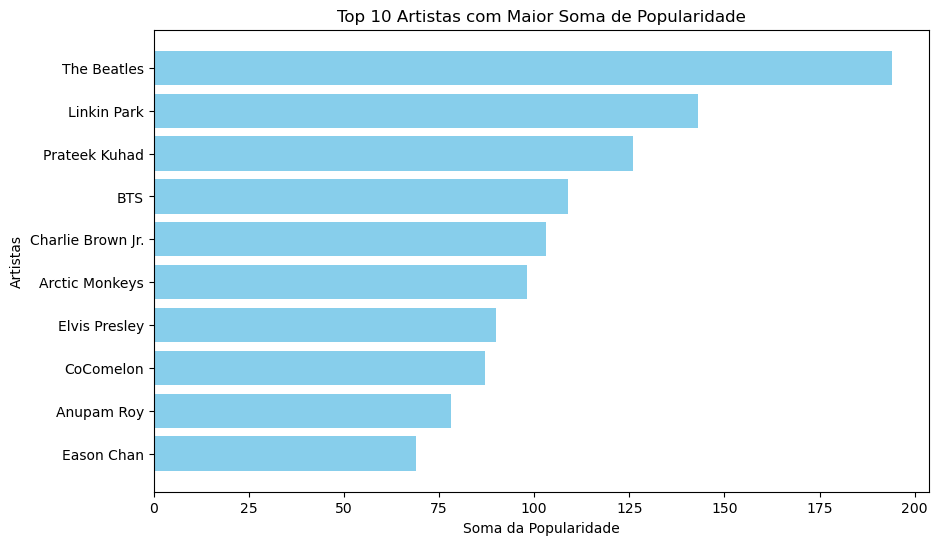

In [445]:
import matplotlib.pyplot as plt

top_10_artists = df.groupby('artists')['popularity_target'].sum().reset_index().sort_values(by='popularity_target', ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.barh(top_10_artists['artists'], top_10_artists['popularity_target'], color='skyblue')
plt.xlabel('Soma da Popularidade')
plt.ylabel('Artistas')
plt.title('Top 10 Artistas com Maior Soma de Popularidade')
plt.gca().invert_yaxis()  
plt.show()


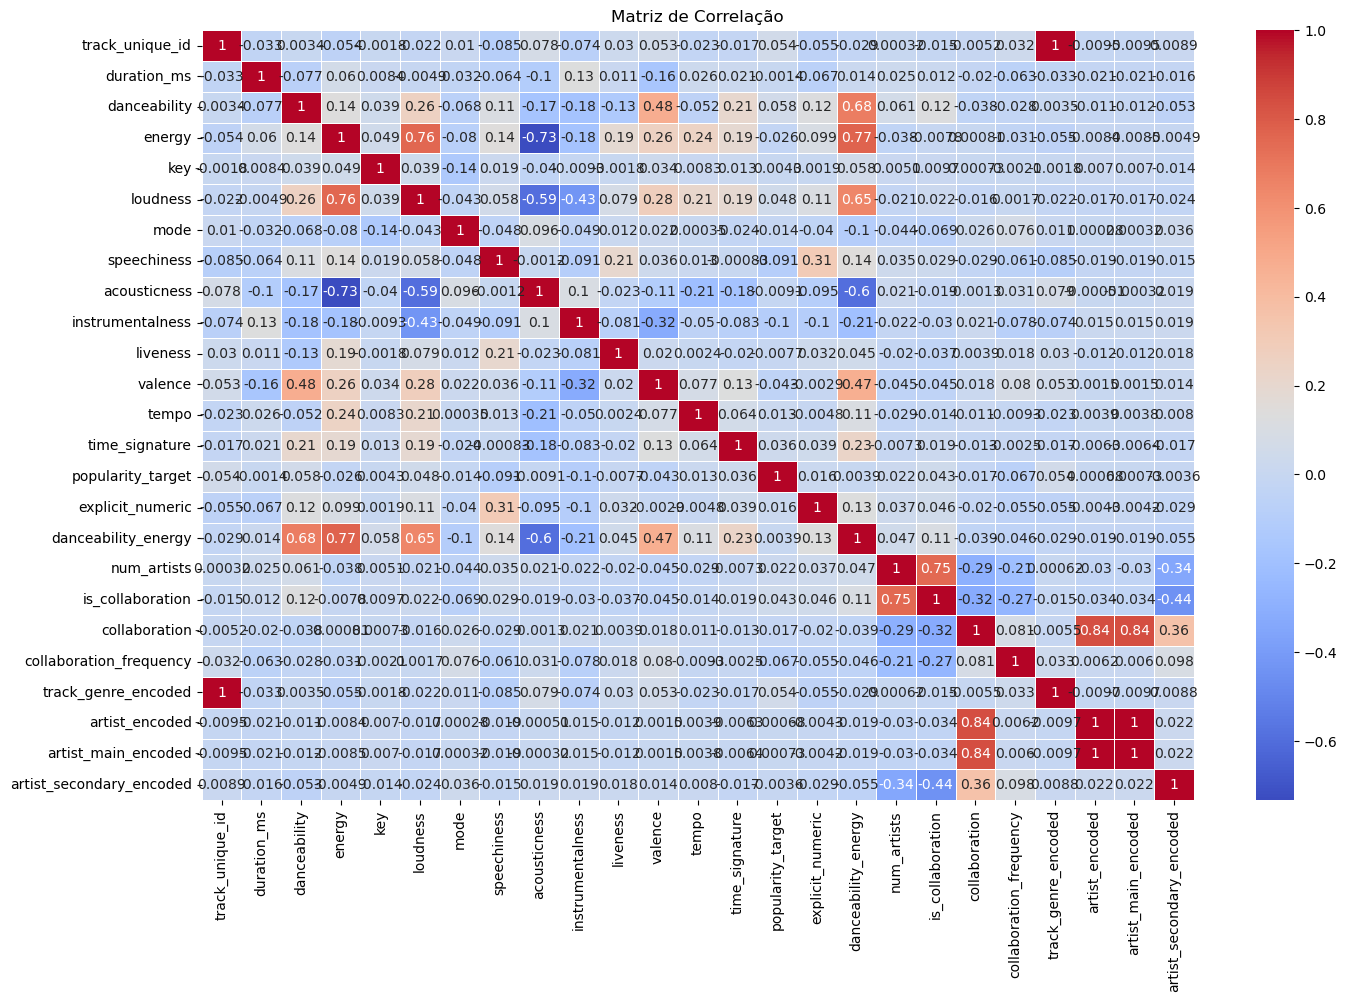

In [446]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gerar a matriz de correlação
correlation_matrix = df.corr(numeric_only=True)

# Plotar o gráfico de correlação usando seaborn
plt.figure(figsize=(16,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

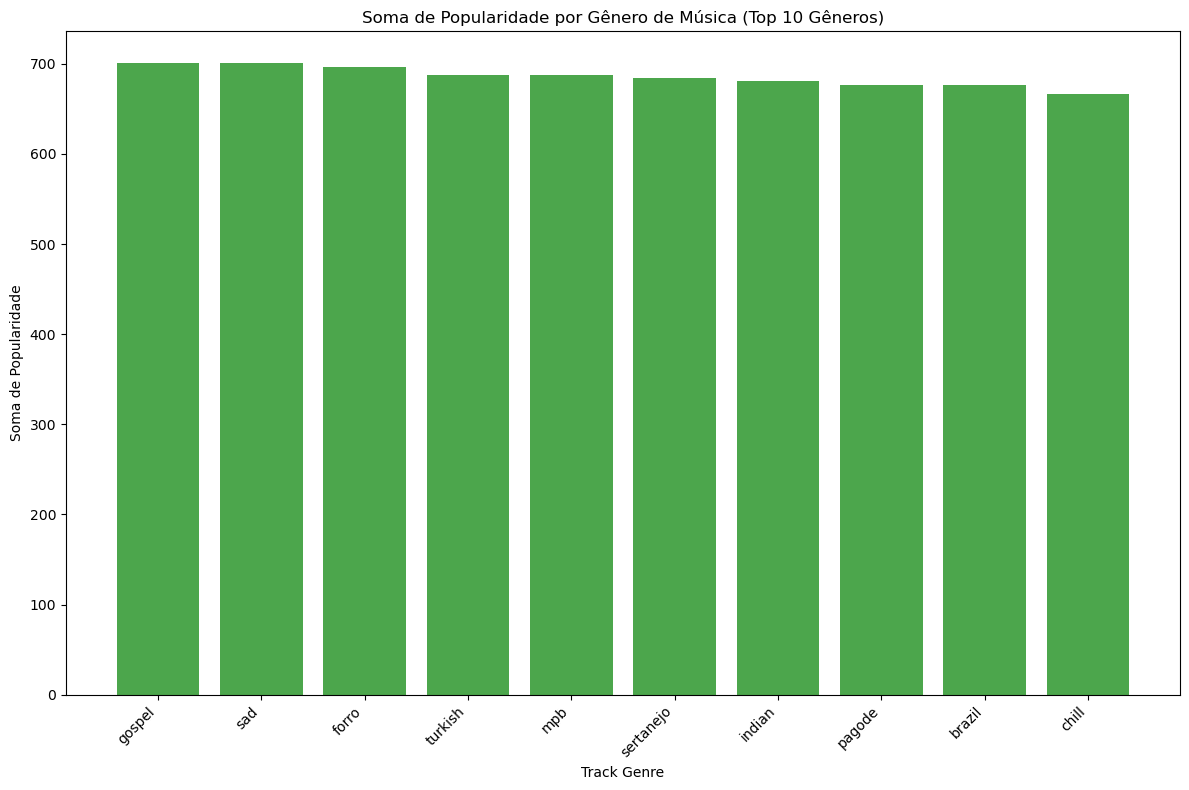

In [447]:
import matplotlib.pyplot as plt

# Filtrar os top 10 gêneros pela soma de 'popularity_target'
top_10_genres = df.groupby('track_genre')['popularity_target'].sum().reset_index().sort_values(by='popularity_target', ascending=False).head(10)

# Plotar o histograma dos top 10 gêneros de música com base na soma de 'popularity_target'
plt.figure(figsize=(12,8))
plt.bar(top_10_genres['track_genre'], top_10_genres['popularity_target'], color='green', alpha=0.7)

# Ajustes no gráfico
plt.xlabel('Track Genre')
plt.ylabel('Soma de Popularidade')
plt.title('Soma de Popularidade por Gênero de Música (Top 10 Gêneros)')
plt.xticks(rotation=45, ha='right')  # Rotacionar os nomes dos gêneros para melhor visualização
plt.tight_layout()

# Exibir o gráfico
plt.show()

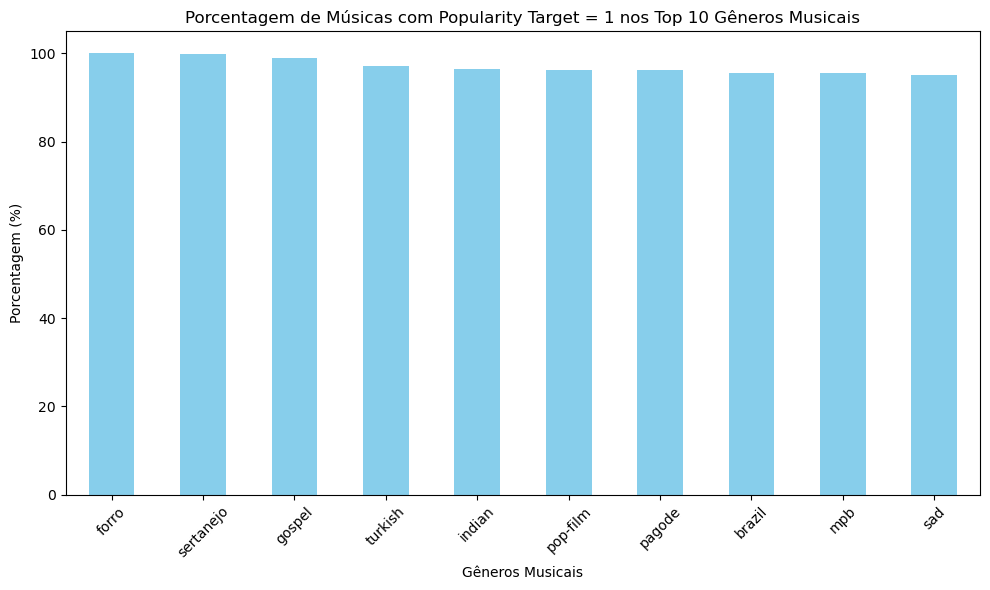

In [448]:
import matplotlib.pyplot as plt
import pandas as pd

df_pop_target_1 = df[df['popularity_target'] == 1]

genre_count_pop1 = df_pop_target_1['track_genre'].value_counts()

genre_count_total = df['track_genre'].value_counts()

genre_percentage_pop1 = (genre_count_pop1 / genre_count_total) * 100
top_10_genres = genre_percentage_pop1.nlargest(10)

# Plotar o gráfico
plt.figure(figsize=(10, 6))
top_10_genres.plot(kind='bar', color='skyblue')
plt.title('Porcentagem de Músicas com Popularity Target = 1 nos Top 10 Gêneros Musicais')
plt.xlabel('Gêneros Musicais')
plt.ylabel('Porcentagem (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Modelo random forest

In [449]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [450]:

# Separar as features (X) e a target (y) do conjunto de treino
X = df.drop(columns=['popularity_target', 'track_unique_id', 'artists', 'track_genre', 'artist_main', 'artist_secondary'])  # Remova as colunas irrelevantes
y = df['popularity_target']

# Dividir o conjunto de dados em 80% para treino e 20% para teste
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [451]:

# Criar o modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model = RandomForestClassifier(max_depth=10, random_state=42)
rf_model = RandomForestClassifier(min_samples_leaf=5, random_state=42)
rf_model = RandomForestClassifier(min_samples_split=10, random_state=42)
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)



In [452]:

# Treinar o modelo
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [453]:

# Fazer previsões no conjunto de validação (20% dos dados)
y_pred = rf_model.predict(X_val)

In [454]:

# Avaliar o modelo
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred)

# Mostrar os resultados
print("Acurácia do modelo:", accuracy)
print("Matriz de confusão:")
print(conf_matrix)
print("\nRelatório de Classificação:")
print(class_report)


Acurácia do modelo: 0.8241854636591479
Matriz de confusão:
[[6722 1525]
 [1281 6432]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      8247
           1       0.81      0.83      0.82      7713

    accuracy                           0.82     15960
   macro avg       0.82      0.82      0.82     15960
weighted avg       0.82      0.82      0.82     15960



In [455]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
print(f"Acurácia média com Cross-Validation: {cv_scores.mean():.2f}")


Acurácia média com Cross-Validation: 0.82


In [456]:
test_df_ids = test_df['track_unique_id']  # Salvar os IDs das músicas

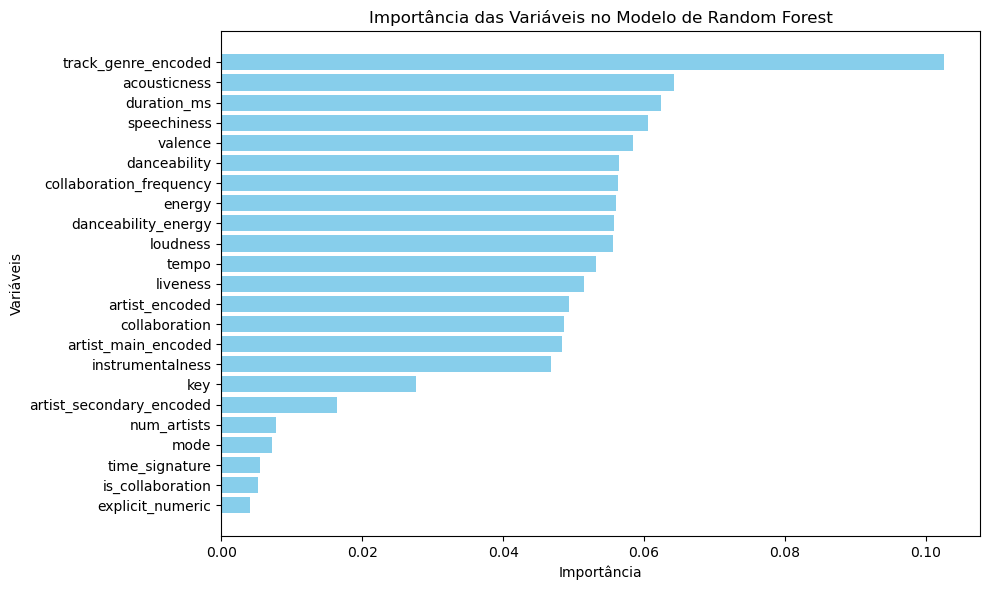

In [457]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Obter a importância das features do modelo treinado
importances = rf_model.feature_importances_

# Obter os nomes das features (as colunas do DataFrame X)
feature_names = X_train.columns

# Criar um DataFrame para armazenar as importâncias
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Ordenar o DataFrame pelas importâncias
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotar o gráfico de barras das importâncias das features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importância')
plt.ylabel('Variáveis')
plt.title('Importância das Variáveis no Modelo de Random Forest')
plt.gca().invert_yaxis()  # Inverter o eixo Y para que a variável mais importante esteja no topo
plt.tight_layout()

# Mostrar o gráfico
plt.show()


In [458]:
def gerar_csv_previsao(test_df, modelo, output_file='submission.csv'):
    X_test = test_df.drop(columns=['track_unique_id', 'artists', 'track_genre', 'artist_main', 'artist_secondary'], errors='ignore')
    
    # Fazer as previsões no conjunto de teste
    y_pred_test = modelo.predict(X_test)
    
    # Criar um DataFrame com os resultados
    submission_df = pd.DataFrame({
        'track_unique_id': test_df_ids,
        'popularity_target': y_pred_test
    })
    
    # Salvar o DataFrame como um arquivo CSV
    submission_df.to_csv(output_file, index=False)
    print(f"Arquivo '{output_file}' gerado com sucesso!")

# Chamar a função para gerar o arquivo .csv
gerar_csv_previsao(test_df, rf_model)


Arquivo 'submission.csv' gerado com sucesso!


In [459]:
df.isna().sum()

track_unique_id             0
artists                     0
duration_ms                 0
danceability                0
energy                      0
                           ..
artist_secondary            0
track_genre_encoded         0
artist_encoded              0
artist_main_encoded         0
artist_secondary_encoded    0
Length: 29, dtype: int64

# Gradient Boosting

In [460]:
from sklearn.ensemble import GradientBoostingClassifier


In [461]:

# Criar o modelo de Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)


In [462]:

# Treinar o modelo
gb_model.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [463]:

# Fazer previsões no conjunto de validação
y_pred_gb = gb_model.predict(X_val)


In [464]:

# Avaliar o modelo
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Avaliar a acurácia
accuracy_gb = accuracy_score(y_val, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_val, y_pred_gb)
class_report_gb = classification_report(y_val, y_pred_gb)

# Exibir os resultados
print(f"Acurácia do modelo Gradient Boosting: {accuracy_gb:.4f}")
print("Matriz de confusão:")
print(conf_matrix_gb)
print("\nRelatório de Classificação:")
print(class_report_gb)


Acurácia do modelo Gradient Boosting: 0.7298
Matriz de confusão:
[[6061 2186]
 [2127 5586]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.74      0.73      0.74      8247
           1       0.72      0.72      0.72      7713

    accuracy                           0.73     15960
   macro avg       0.73      0.73      0.73     15960
weighted avg       0.73      0.73      0.73     15960



In [465]:
from sklearn.model_selection import cross_val_score

# Fazer a validação cruzada com 5 folds
cv_scores_gb = cross_val_score(gb_model, X_train, y_train, cv=5, scoring='accuracy')

# Exibir os resultados
print(f"Acurácia média com Cross-Validation (Gradient Boosting): {cv_scores_gb.mean():.4f}")


Acurácia média com Cross-Validation (Gradient Boosting): 0.7249


In [466]:
from sklearn.ensemble import VotingClassifier

# Criar o ensemble com Random Forest e Gradient Boosting
ensemble_model = VotingClassifier(estimators=[
    ('rf', rf_model),  # O melhor modelo de Random Forest obtido no GridSearchCV
    ('gb', gb_model)        # O modelo de Gradient Boosting treinado acima
], voting='hard')

# Treinar o ensemble
ensemble_model.fit(X_train, y_train)

# Fazer previsões no conjunto de validação
y_pred_ensemble = ensemble_model.predict(X_val)

# Avaliar o ensemble
accuracy_ensemble = accuracy_score(y_val, y_pred_ensemble)
conf_matrix_ensemble = confusion_matrix(y_val, y_pred_ensemble)
class_report_ensemble = classification_report(y_val, y_pred_ensemble)

# Exibir os resultados
print(f"Acurácia do modelo Ensemble: {accuracy_ensemble:.4f}")
print("Matriz de confusão:")
print(conf_matrix_ensemble)
print("\nRelatório de Classificação:")
print(class_report_ensemble)


Acurácia do modelo Ensemble: 0.7769
Matriz de confusão:
[[7185 1062]
 [2498 5215]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.74      0.87      0.80      8247
           1       0.83      0.68      0.75      7713

    accuracy                           0.78     15960
   macro avg       0.79      0.77      0.77     15960
weighted avg       0.78      0.78      0.77     15960

